Python Project - Marvel Mart Project
Daniel Rios
3/15/2023

In [242]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Part 1: Cleaning the Data

In [511]:
# load the CSV file into the Marvel Mart DataFrame
sales = pd.read_csv('Data/MM_Sales.csv')
# print the shape and count of the DataFrame
print(sales.shape)
print(sales.count())

# compute the sum of missing values for each column
sumNA = sales.isna().sum()
print(sumNA) 

# assign sales the variable salesClean for data cleaning
salesClean = sales

(50000, 14)
Region            50000
Country           50000
Item Type         49994
Sales Channel     50000
Order Priority    49985
Order Date        50000
Order ID          50000
Ship Date         50000
Units Sold        50000
Unit Price        50000
Unit Cost         50000
Total Revenue     50000
Total Cost        50000
Total Profit      50000
dtype: int64
Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


Countries

In [515]:
count = 0
for index, row in salesClean.iterrows():
    try:
        # try to convert each value in the 'Country' column to a float
        # if it succeeds the value is numeric and therefore incorrect
        float(row['Country'])
        print(row['Country'])
        salesClean.loc[index, 'Country'] = "NULL"
        print("After Cleaned")
        print(salesClean.loc[index, 'Country'])   
        count += 1
    except ValueError:
        # if it fails the value is not numeric and therefore valid
        pass
    
print(f"Number of incorrect data in Countries: {count}")

# ouput is the incorrect data, what it's replaced with, and the total count

154.06
After Cleaned
NULL
437.2
After Cleaned
NULL
651.21
After Cleaned
NULL
Number of incorrect data in Countries: 3


In [ ]:
Item Type

In [323]:
# compute the number of missing values in the 'Item Type' column
num_null = sales['Item Type'].isnull().sum()
print('\n'.join(['NULL' for _ in range(num_null)]))

# print the total number of missing values in the 'Item Type' column
print("Number of missing values:", num_null)

# replace missing and null Item Types with 'NULL'
sales['Item Type'] = sales['Item Type'].fillna('NULL')

# check for invalid Item Types
item_type_counts = sales['Item Type'].value_counts()
invalid_item_types = [item_type for item_type in item_type_counts.index if item_type_counts[item_type] == 1]
print(f"Number of Invalid Item types: {len(invalid_item_types)}")

# ouput is the incorrect or missing data, what it's replaced with, and the total count

NULL
NULL
NULL
NULL
NULL
NULL
Number of missing values: 6
Number of Invalid Item types: 0


Order Priority 

In [45]:
valid_priority_codes = ['C', 'H', 'M', 'L', 'NULL']

# replace missing values with 'NULL'
num_null = sales['Order Priority'].isnull().sum()
print('\n'.join(['NULL' for _ in range(num_null)]))
sales['Order Priority'] = sales['Order Priority'].fillna('NULL')

# identify rows with invalid Order Priority codes
invalid_codes = sales[~sales['Order Priority'].isin(valid_priority_codes)]
if len(invalid_codes) > 0:
    print("Invalid Order Priority values:")
    print(invalid_codes['Order Priority'].unique())

    # drop rows with invalid codes
    sales.drop(invalid_codes.index, inplace=True)

print(f"Number of missing values: {num_null}")
print(f"Number of Invalid Code types: {len(invalid_codes)}")

# ouput is the incorrect or missing data, what it's replaced with, and the total count

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
Number of missing values: 15
Number of Invalid Code types: 0


Order ID

In [516]:
count = 0
# iterate over each row 
for index, row in salesClean.iterrows():
    try:
        # try to convert each value in the 'Order ID' column to a float
        # if it succeeds, the value is numeric and therefore valid
        float(row['Order ID'])
    except ValueError: 
        # if it fails, the value is not numeric and therefore incorrect
        print(row['Order ID'])
        salesClean.loc[index, 'Order ID'] = 0
        print("After Cleaned")
        print(salesClean.loc[index, 'Order ID'])
        count += 1

print(f"Number of incorrect data in Order ID: {count}")

# output is the incorrect data, what it's replaced with, and the total count

Cosmetics
After Cleaned
0
Fruits
After Cleaned
0
Snacks
After Cleaned
0
Meat
After Cleaned
0
Snacks
After Cleaned
0
Number of incorrect data in Order ID: 5


Remove the previous rows where there are either NULL values (Country, Item Type, Order Priority) using the isnull() function or values of 0 (Order ID) with the != operator. Then the number of NULL and 0 values are tested to confirm the rows have been removed.

In [82]:
salesClean = salesClean[~pd.isnull(salesClean['Country'])]
salesClean = salesClean[~pd.isnull(salesClean['Item Type'])]
salesClean = salesClean[~pd.isnull(salesClean['Order Priority'])]
salesClean = salesClean[salesClean['Order ID'] != 0]

In [83]:
print(salesClean['Country'][salesClean['Country'].isnull()].count())
print(salesClean['Item Type'][salesClean['Item Type'].isnull()].count())
print(salesClean['Order Priority'][salesClean['Order Priority'].isnull()].count())
print(salesClean['Order ID'][salesClean['Order ID'] == 0].count()) 

0
0
0
0


Write to a new dataframe 'MM_Sales_clean' with the columns of incorrect data removed. Assign the variable salesclean1 to this new dataframe.

In [509]:
salesClean.to_csv('MM_Sales_clean.csv', index=True)

salesclean1 = pd.read_csv('Data/MM_Sales_clean.csv')

Part 2: Exploratory Data Analysis with Reports & Visualizations

1

In [105]:
# compute the count of sales by country and sort them in descending order
sales_by_country = salesclean1['Country'].value_counts().sort_values(ascending=False)

# get the top 10 countries
top_10_countries = sales_by_country[:10]

# print the top 10 countries with their frequency
print(top_10_countries)

Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


1.1

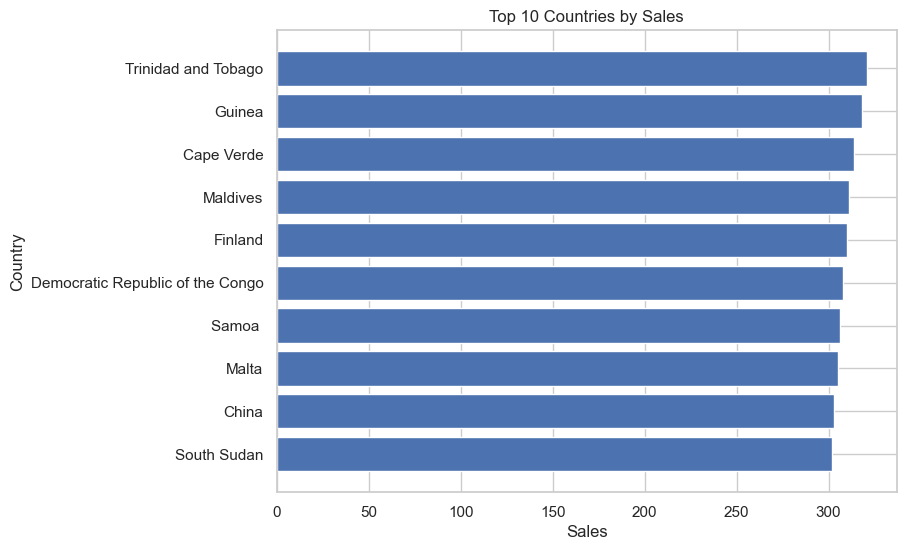

In [249]:
# select the top 10 countries by sales and sort them in ascending order (for visual clarity)
top_10_countries = sales_by_country.nlargest(10).sort_values()

# create a horizontal barplot displaying the top 10 countries by sales
plt.figure(figsize=(8, 6))
plt.barh(top_10_countries.index, top_10_countries.iloc[::], color='b')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.show()

The country we should build our new shipping center in is Cape Verde because the country has the most sales among countries without a shipping center at 314.

1.2

In [513]:
# get the sales count by country in descending order
sales_by_country = salesclean1['Country'].value_counts().sort_values(ascending=False)

# get the top 10 countries
top_10_countries = sales_by_country[:10]

# open the 'MM_Rankings.txt' text file in append mode
with open('MM_Rankings.txt', 'a') as file:
    file.write('Countries Most Sale Transactions:\n')
    # write each country and its sales count
    for country, sales_count in top_10_countries.items():
        file.write(f'{country}: {sales_count}\n')
        
# write the answered question for choosing a country to build a new shipping center
with open('MM_Rankings.txt', 'a') as file:
    file.write(f'The country we should build our new shipping center in is Cape Verde because the country has the most sales among countries without a shipping center at 314.\n')

2.1

In [135]:
# get the count of each unique sales channel in salesclean1 
sales_channel_count = salesclean1['Sales Channel'].value_counts()

# print the count of Online and Offline sales 
print(sales_channel_count)

Online     30183
Offline    19788
Name: Sales Channel, dtype: int64


2.2

In [136]:
# get the count of each different order priority type
order_priority_types = salesclean1['Order Priority'].value_counts()

# print the count of each order priority type
print(order_priority_types)

M    19881
H    15094
L     9984
C     5012
Name: Order Priority, dtype: int64


2.3

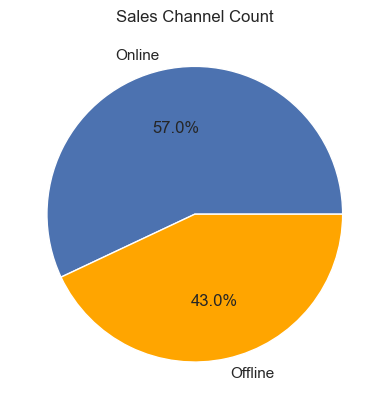

In [248]:
colors = ['b', 'orange']

# create a pie chart of the count of each sales channel including percentages 
plt.pie(sales_channel_count, labels=sales_channel_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Sales Channel Count')

plt.show()

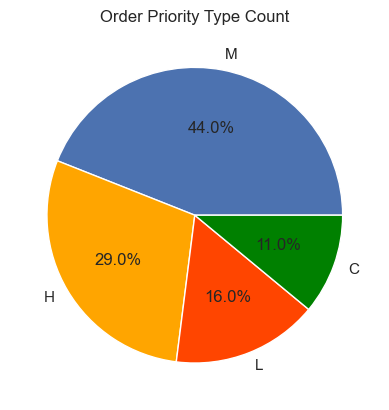

In [247]:
colors = ['b', 'orange', 'orangered', 'green']

# create a pie chart showing the count of each order priority type including percentages
plt.pie(order_priority_types, labels=order_priority_types.index, autopct='%1.1f%%', colors=colors)
plt.title('Order Priority Type Count')

plt.show()

2.4

In [514]:
# get the sales channel count
sales_channel_count = salesclean1['Sales Channel'].value_counts()

# write sales channel counts to the 'MM_Rankings' text file
with open('MM_Rankings.txt', 'a') as file:
    print()
    file.write('\nSales Channels:\n')
    for channel, count in sales_channel_count.items():
        file.write(f'{channel}: {count}\n')
        # determine which type of sales channel is most common and write the result to the text file
    if sales_channel_count['Online'] > sales_channel_count['Offline']:
        file.write('We do more online sales.\n')
    else:
        file.write('We do more offline sales.\n')

# get the order priority types count and which one has the highest count
order_priority_types = salesclean1['Order Priority'].value_counts()

highest_priority_type = order_priority_types.index[0]

# write order priority counts to the file
with open('MM_Rankings.txt', 'a') as file:
    file.write('\nOrder Priorities:\n')
    for priority, count in order_priority_types.items():
        file.write(f'{priority}: {count}\n')
        # write which order priority type is most common to the text file
    file.write(f"We do more {highest_priority_type} order priorities.\n")

3.1

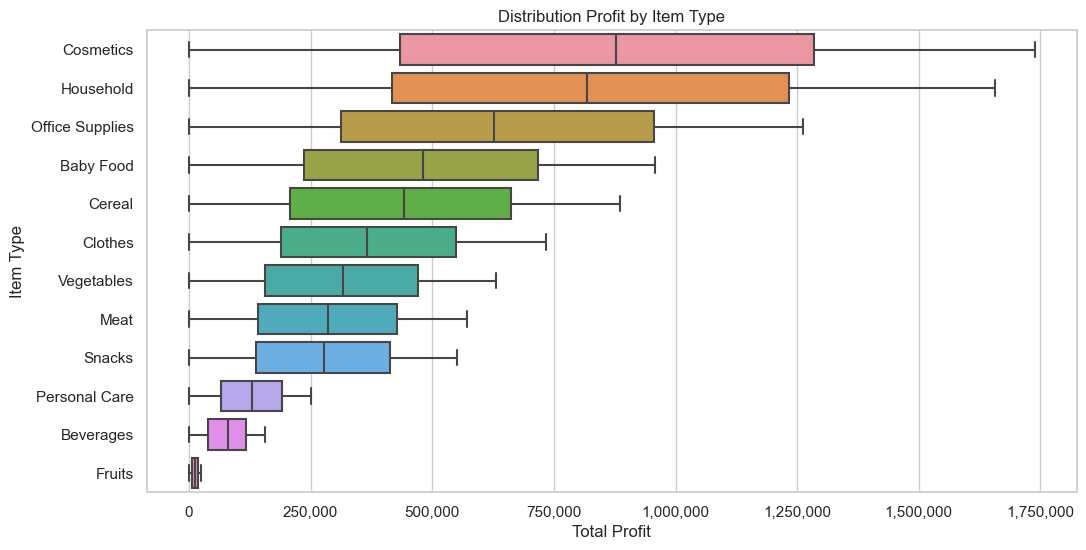

In [299]:
# sort the Item Types by total profit in descending order
salesclean1_sorted = salesclean1.sort_values(by='Total Profit', ascending=False)

# create a box plot showing the distribution of profit by Item Type
plt.figure(figsize=(12, 6))
ax = sns.boxplot(y='Item Type', x='Total Profit', data=salesclean1_sorted, orient='h')
ax.set(title='Distribution Profit by Item Type', xlabel='Total Profit', ylabel='Item Type')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

3.2

In [243]:
# group by item type and calculate the total profit for each type
total_profit_by_item = salesclean1.groupby('Item Type')['Total Profit'].sum()

print(total_profit_by_item)

Item Type
Baby Food         1942865748.120
Beverages          327559249.080
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638407966.750
Fruits              51010570.920
Household         3401180998.060
Meat              1196342404.400
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149715758.720
Vegetables        1322639660.240
Name: Total Profit, dtype: float64


3.3

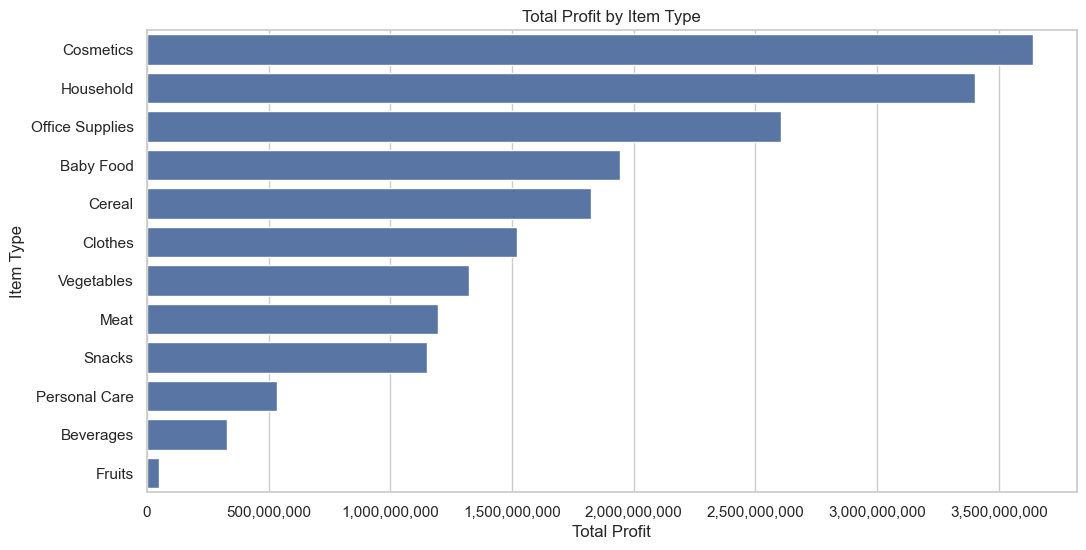

In [279]:
# import the ticker module to format the x axis 
import matplotlib.ticker as ticker

# group by item type and calculate the total profit for each type then sort in descending order
total_profit_by_item = salesclean1.groupby('Item Type')['Total Profit'].sum().reset_index()
total_profit_by_item = total_profit_by_item.sort_values('Total Profit', ascending=False)

# create a bar plot showing total profit by item type
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Total Profit', y='Item Type', data=total_profit_by_item, color='b')
ax.set(title='Total Profit by Item Type', xlabel='Total Profit', ylabel='Item Type')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

3.4

In [280]:
# group by item type and get the top 3 items by sum of total profit
total_profit_by_item = salesclean1.groupby('Item Type')['Total Profit'].sum()
top_3 = total_profit_by_item.nlargest(3)

# print the top 3 item types and their total profit
for item_type, profit in zip(top_3.index, top_3.values):
    print(item_type, ':', profit)

Cosmetics : 3638407966.75
Household : 3401180998.06
Office Supplies : 2605440187.5


3.5

In [298]:
total_profit_by_item = salesclean1.groupby('Item Type')['Total Profit'].sum()
top_3 = total_profit_by_item.nlargest(3)

# make an list of the top 3 most profitable items 
item_names = ['Cosmetics', 'Household', 'Office Supplies']

# open the MM_Rankings text file and write the most profitable items to it 
with open('MM_Rankings.txt', 'a') as file:
    file.write('\nHighest Selling Items:\n')
    for i, (item_type, profit) in enumerate(zip(top_3.index, top_3.values)):
        item_name = item_names[i]
        file.write(f'{item_name}: ${profit:,.2f}\n')
        # write the item with the highest profit to the text file
    file.write(f'We profited from {top_3.index[0]} the most.\n')

3.6

Distributions give us a wide range of variables and where they fall in a single picture. So we can see outliers and where products generally land in terms of their total revenue per sale--to find accurate insights. 

It's clear that Cosmetics and Household Items are providing the most profit to the company by a wide margin, we should consider looking into why these products are so profitable and how we can apply that to other Item Types. Something to consider is where items are made, is one warehouse in a specific country supplying a lower cost per unit than others? We should also consider macroeconomic conditions, is the cost of manufacturing certain products has become more expensive because of inflation? Are fruits at a higher cost right now due to low supply? Maybe clothing manufacturing warehouses are struggling because of a health crisis.

One unexpected result is that Food related goods have lower sales compared to other item categories. Factors such as changing consumer preferences, competition from other brands, or a decline in global food resources should be considered when looking at improving the sector of the business. Looking in depth at the costs of these items could prove useful.

Looking at the Total Profit by Item Type we can see that it closely follows the boxplot showing the Total Profit per sale--A lot of the insights we take away from the boxplot can be reaffirmed here. It's possible that something we should consider is the increased benefit of larger more profitable sales with bigger clients, rather than a higher volume of smaller sales--because there's a strong coorelation between higher profits per sale and overall profits. Looking at the number of sales per Item Type and average Units Sold could answer this question.

4.1

In [378]:
# calculate the sum of units sold, unit cost, total revenue, total cost, and total profit using the sum() function
sum_units_sold = salesclean1['Units Sold'].sum()
sum_unit_cost = salesclean1['Unit Cost'].sum()
sum_total_revenue = salesclean1['Total Revenue'].sum()
sum_total_cost = salesclean1['Total Cost'].sum()
sum_total_profit = salesclean1['Total Profit'].sum()

# print the sums
print("Sums:")
print(f"Units Sold: {sum_units_sold}")
print(f"Unit Cost: {sum_unit_cost:.2f}")
print(f"Total Revenue: {sum_total_revenue:.2f}")
print(f"Total Cost: {sum_total_cost:.2f}")
print(f"Total Profit: {sum_total_profit:.2f}\n")

Sums:
Units Sold: 249818150
Unit Cost: 9360768.32
Total Revenue: 66145004417.17
Total Cost: 46629032915.81
Total Profit: 19515971501.36



4.2

In [373]:
# calculate the average of units sold, unit cost, total revenue, total cost, and total profit using the mean() function
avg_units_sold = salesclean1['Units Sold'].mean()
avg_unit_cost = salesclean1['Unit Cost'].mean()
avg_total_revenue = salesclean1['Total Revenue'].mean()
avg_total_cost = salesclean1['Total Cost'].mean()
avg_total_profit = salesclean1['Total Profit'].mean()

# print the averages
print("Averages:")
print(f"Units Sold: {avg_units_sold:.2f}")
print(f"Unit Cost: {avg_unit_cost:.2f}")
print(f"Total Revenue: {avg_total_revenue:.2f}")
print(f"Total Cost: {avg_total_cost:.2f}")
print(f"Total Profit: {avg_total_profit:.2f}\n")

Averages:
Units Sold: 4999.26
Unit Cost: 187.32
Total Revenue: 1323667.82
Total Cost: 933121.87
Total Profit: 390545.95



4.3

In [374]:
# calculate the max from units sold, unit cost, total revenue, total cost, and total profit using the max() function
max_units_sold = salesclean1['Units Sold'].max()
max_unit_cost = salesclean1['Unit Cost'].max()
max_total_revenue = salesclean1['Total Revenue'].max()
max_total_cost = salesclean1['Total Cost'].max()
max_total_profit = salesclean1['Total Profit'].max()

# print the maximums
print("Maximums:")
print(f"Units Sold: {max_units_sold:}")
print(f"Unit Cost: {max_unit_cost:.2f}")
print(f"Total Revenue: {max_total_revenue:.2f}")
print(f"Total Cost: {max_total_cost:.2f}")
print(f"Total Profit: {max_total_profit:.2f}")

Maximums:
Units Sold: 10000
Unit Cost: 524.96
Total Revenue: 6682031.73
Total Cost: 5249075.04
Total Profit: 1738178.39


4.4

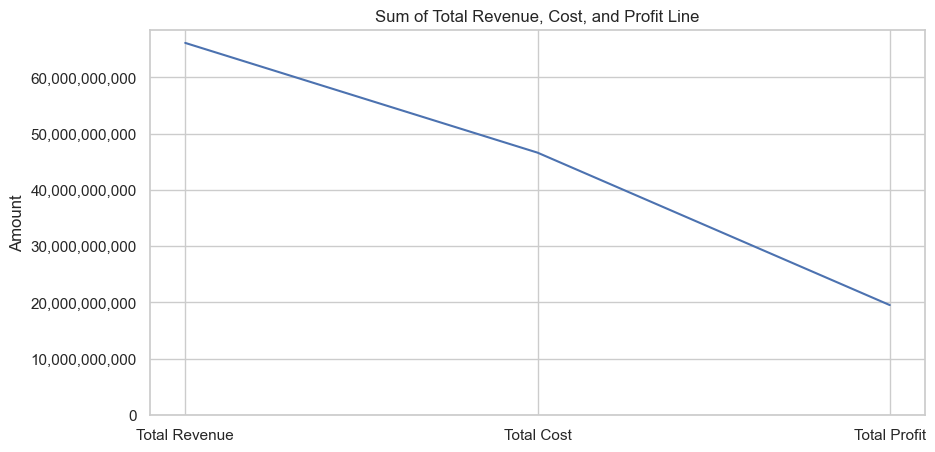

In [510]:
import matplotlib.ticker as ticker

# calculate sum values
x = ['Total Revenue', 'Total Cost', 'Total Profit']
y = [salesclean1['Total Revenue'].sum(), salesclean1['Total Cost'].sum(), salesclean1['Total Profit'].sum()]

# create a line plot showing the sum of total reveue, cost, and profit 
plt.figure(figsize=(10,5))
plt.plot(x, y, color='b')
plt.title('Sum of Total Revenue, Cost, and Profit Line')
plt.ylabel('Amount')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylim(bottom=0)
plt.show()

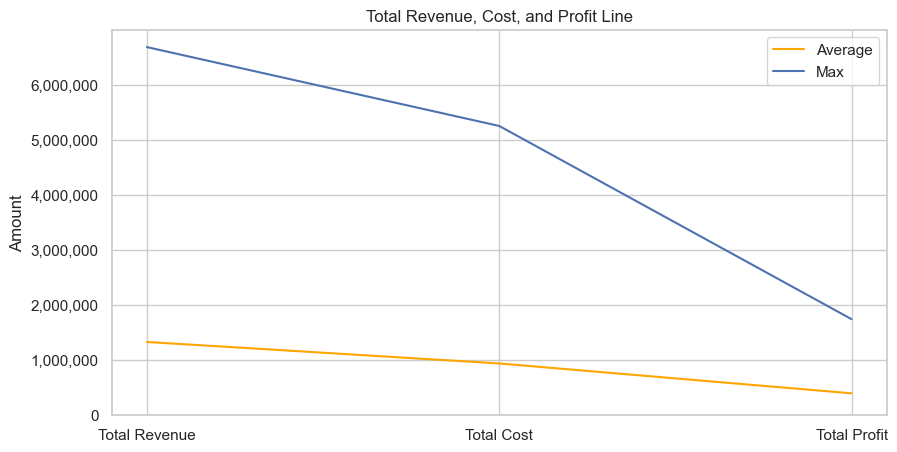

In [360]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))

# calculate mean and max values
x = ['Total Revenue', 'Total Cost', 'Total Profit']
mean_y = [salesclean1['Total Revenue'].mean(), salesclean1['Total Cost'].mean(), salesclean1['Total Profit'].mean()]
sum_y = [salesclean1['Total Revenue'].max(), salesclean1['Total Cost'].max(), salesclean1['Total Profit'].max()]

# plot mean line
plt.plot(x, mean_y, color='orange', label='Average')

# Plot max line
plt.plot(x, sum_y, color='b', label='Max')

plt.title('Total Revenue, Cost, and Profit Line')
plt.ylabel('Amount')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylim(bottom=0)
plt.legend() # add legend for clarity

plt.show()

4.5

In [377]:
# open a new file 'MM_Calc.txt' 
with open("MM_Calc.txt", "w") as f:
    # write the sums to the file
    f.write("Sums:\n")
    f.write(f"Units Sold: {sum_units_sold}\n")
    f.write(f"Unit Cost: {sum_unit_cost:.2f}\n")
    f.write(f"Total Revenue: {sum_total_revenue:.2f}\n")
    f.write(f"Total Cost: {sum_total_cost:.2f}\n")
    f.write(f"Total Profit: {sum_total_profit:.2f}\n")
    
    # write the averages to the file
    f.write("\nAverages:\n")
    f.write(f"Units Sold: {avg_units_sold}\n")
    f.write(f"Unit Cost: {avg_unit_cost:.2f}\n")
    f.write(f"Total Revenue: {avg_total_revenue:.2f}\n")
    f.write(f"Total Cost: {avg_total_cost:.2f}\n")
    f.write(f"Total Profit: {avg_total_profit:.2f}\n")
    
    # write the maximums to the file
    f.write("\nMaximums:\n")
    f.write(f"Units Sold: {max_units_sold}\n")
    f.write(f"Unit Cost: {max_unit_cost:.2f}\n")
    f.write(f"Total Revenue: {max_total_revenue:.2f}\n")
    f.write(f"Total Cost: {max_total_cost:.2f}\n")
    f.write(f"Total Profit: {max_total_profit:.2f}\n")

Part 3: Cross-Reference Statistics

1.1

In [502]:
import csv

# create an empty dictionary
regionsdf = {}

# open 'MM_Sales_clean' and use DictReader to read it as a dictionary, use the variable 'reader'
with open("MM_Sales_clean.csv", "r") as MM_Sales_clean:
    reader = csv.DictReader(MM_Sales_clean)

    # loop through rows in the CSV file and extract the countries and regions
    for row in reader:
        region = row['Region']
        country = row['Country']
        
        # check if the region is in the dictionary, if so add the country if it's not already there
        if region in regionsdf:
            if country not in regionsdf[region]:
                regionsdf[region].append(country)
                
        # if the region isn't in the dictionary, add it and add the country to a new list
        else: 
            regionsdf[region] = [country]

# print the regionsdf dictionary with the output of regions and their associated countries
print(regionsdf)

{'Sub-Saharan Africa': ['Namibia', 'Djibouti', 'Cameroon', 'Nigeria', 'Senegal', 'Rwanda', 'South Sudan', 'Guinea', 'Botswana', 'Sudan', 'Tanzania', 'Sao Tome and Principe', 'Cape Verde', 'Guinea-Bissau', 'South Africa', 'Sierra Leone', 'Mozambique', 'Chad', 'Togo', 'Mali', 'Equatorial Guinea', 'Eritrea', 'Niger', 'Madagascar', 'Gabon', 'Angola', 'Ethiopia', 'Liberia', 'Democratic Republic of the Congo', 'Seychelles ', 'Mauritius ', 'Comoros', 'Burundi', 'Zambia', 'Lesotho', 'The Gambia', 'Benin', 'Malawi', 'Mauritania', 'Central African Republic', 'Kenya', 'Ghana', 'Swaziland', 'Burkina Faso', 'Uganda', 'Zimbabwe', "Cote d'Ivoire", 'Republic of the Congo'], 'Europe': ['Iceland', 'Russia', 'Moldova ', 'Malta', 'Greece', 'Ukraine', 'Finland', 'United Kingdom', 'San Marino', 'Kosovo', 'Hungary', 'Serbia', 'Poland', 'Lithuania', 'Portugal', 'Georgia', 'Bulgaria', 'Austria', 'Romania', 'Denmark', 'Luxembourg', 'Croatia', 'Sweden', 'Cyprus', 'Montenegro', 'Vatican City', 'France', 'Netherla

1.2

In [520]:
# create a pandas dataframe from regionsdf
unique_regions = pd.DataFrame.from_dict(regionsdf, orient='index')

# transpose the dataframe
unique_regions = unique_regions.transpose()

# write the DataFrame to a csv file 'Countries_By_Region'
unique_regions.to_csv("Countries_By_Region.csv", index=False)